# Data Science Bootcamp - Project 4
Team Members:
* Ben Calderaio
* Conrad Urffer
* Clara Bucar
* Tammy Lacher
* Jeff Pinegar

Due Date: March 22, 2023

---
# Data Cleaning
This program is used to Extract, Transform and Load our data.  Seperate files will then load this data and perform model fitting.

### Imports

In [18]:
# imports
# Data loading
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
from sql_config import protocol, username, password, host, port, database_name
import csv
import os

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Common laibraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import numpy as np

# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

import warnings
warnings.filterwarnings('ignore')

---
# Load Clean Data from Postgres

In [2]:
# create db connection and engine
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

# Read in the postgres cleaned data in table "app_data_clean" into a dataframe
df_clean = pd.read_sql_query('select * from proj4_sch.app_data_clean', con=engine)

In [3]:
df = df_clean
df.describe(include = 'all').round(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOC_COUNT
count,307505.000,307505,307505,307505,307505,307505.000,3.075050e+05,307505.000,307505.000,307505.000,...,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,278232,202447,202920,213306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.081,NaN,NaN,NaN,NaN,0.416,1.687967e+05,599028.395,27107.580,537914.488,...,1.401,0.100,-962.859,0.006,0.006,0.030,0.231,0.230,1.643,0.930
std,0.272,NaN,NaN,NaN,NaN,0.715,2.371248e+05,402493.887,14494.547,369633.198,...,2.377,0.362,826.814,0.078,0.103,0.191,0.857,0.744,1.856,0.344
min,0.000,NaN,NaN,NaN,NaN,0.000,2.565000e+04,45000.000,0.000,0.000,...,0.000,0.000,-4292.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,NaN,NaN,NaN,NaN,0.000,1.125000e+05,270000.000,16524.000,238500.000,...,0.000,0.000,-1570.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,NaN,NaN,NaN,NaN,0.000,1.471500e+05,513531.000,24903.000,450000.000,...,0.000,0.000,-757.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
75%,0.000,NaN,NaN,NaN,NaN,1.000,2.025000e+05,808650.000,34596.000,679500.000,...,2.000,0.000,-274.000,0.000,0.000,0.000,0.000,0.000,3.000,1.000


array([[<AxesSubplot: title={'center': 'TARGET'}>,
        <AxesSubplot: title={'center': 'CNT_CHILDREN'}>,
        <AxesSubplot: title={'center': 'AMT_INCOME_TOTAL'}>,
        <AxesSubplot: title={'center': 'AMT_CREDIT'}>,
        <AxesSubplot: title={'center': 'AMT_ANNUITY'}>,
        <AxesSubplot: title={'center': 'AMT_GOODS_PRICE'}>,
        <AxesSubplot: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot: title={'center': 'DAYS_BIRTH'}>],
       [<AxesSubplot: title={'center': 'DAYS_EMPLOYED'}>,
        <AxesSubplot: title={'center': 'DAYS_REGISTRATION'}>,
        <AxesSubplot: title={'center': 'DAYS_ID_PUBLISH'}>,
        <AxesSubplot: title={'center': 'OWN_CAR_AGE'}>,
        <AxesSubplot: title={'center': 'FLAG_EMP_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_WORK_PHONE'}>,
        <AxesSubplot: title={'center': 'FLAG_CONT_MOBILE'}>,
        <AxesSubplot: title={'center': 'FLAG_PHONE'}>],
       [<AxesSubplot: title={'center': 'FLAG_EMAIL'}>,
      

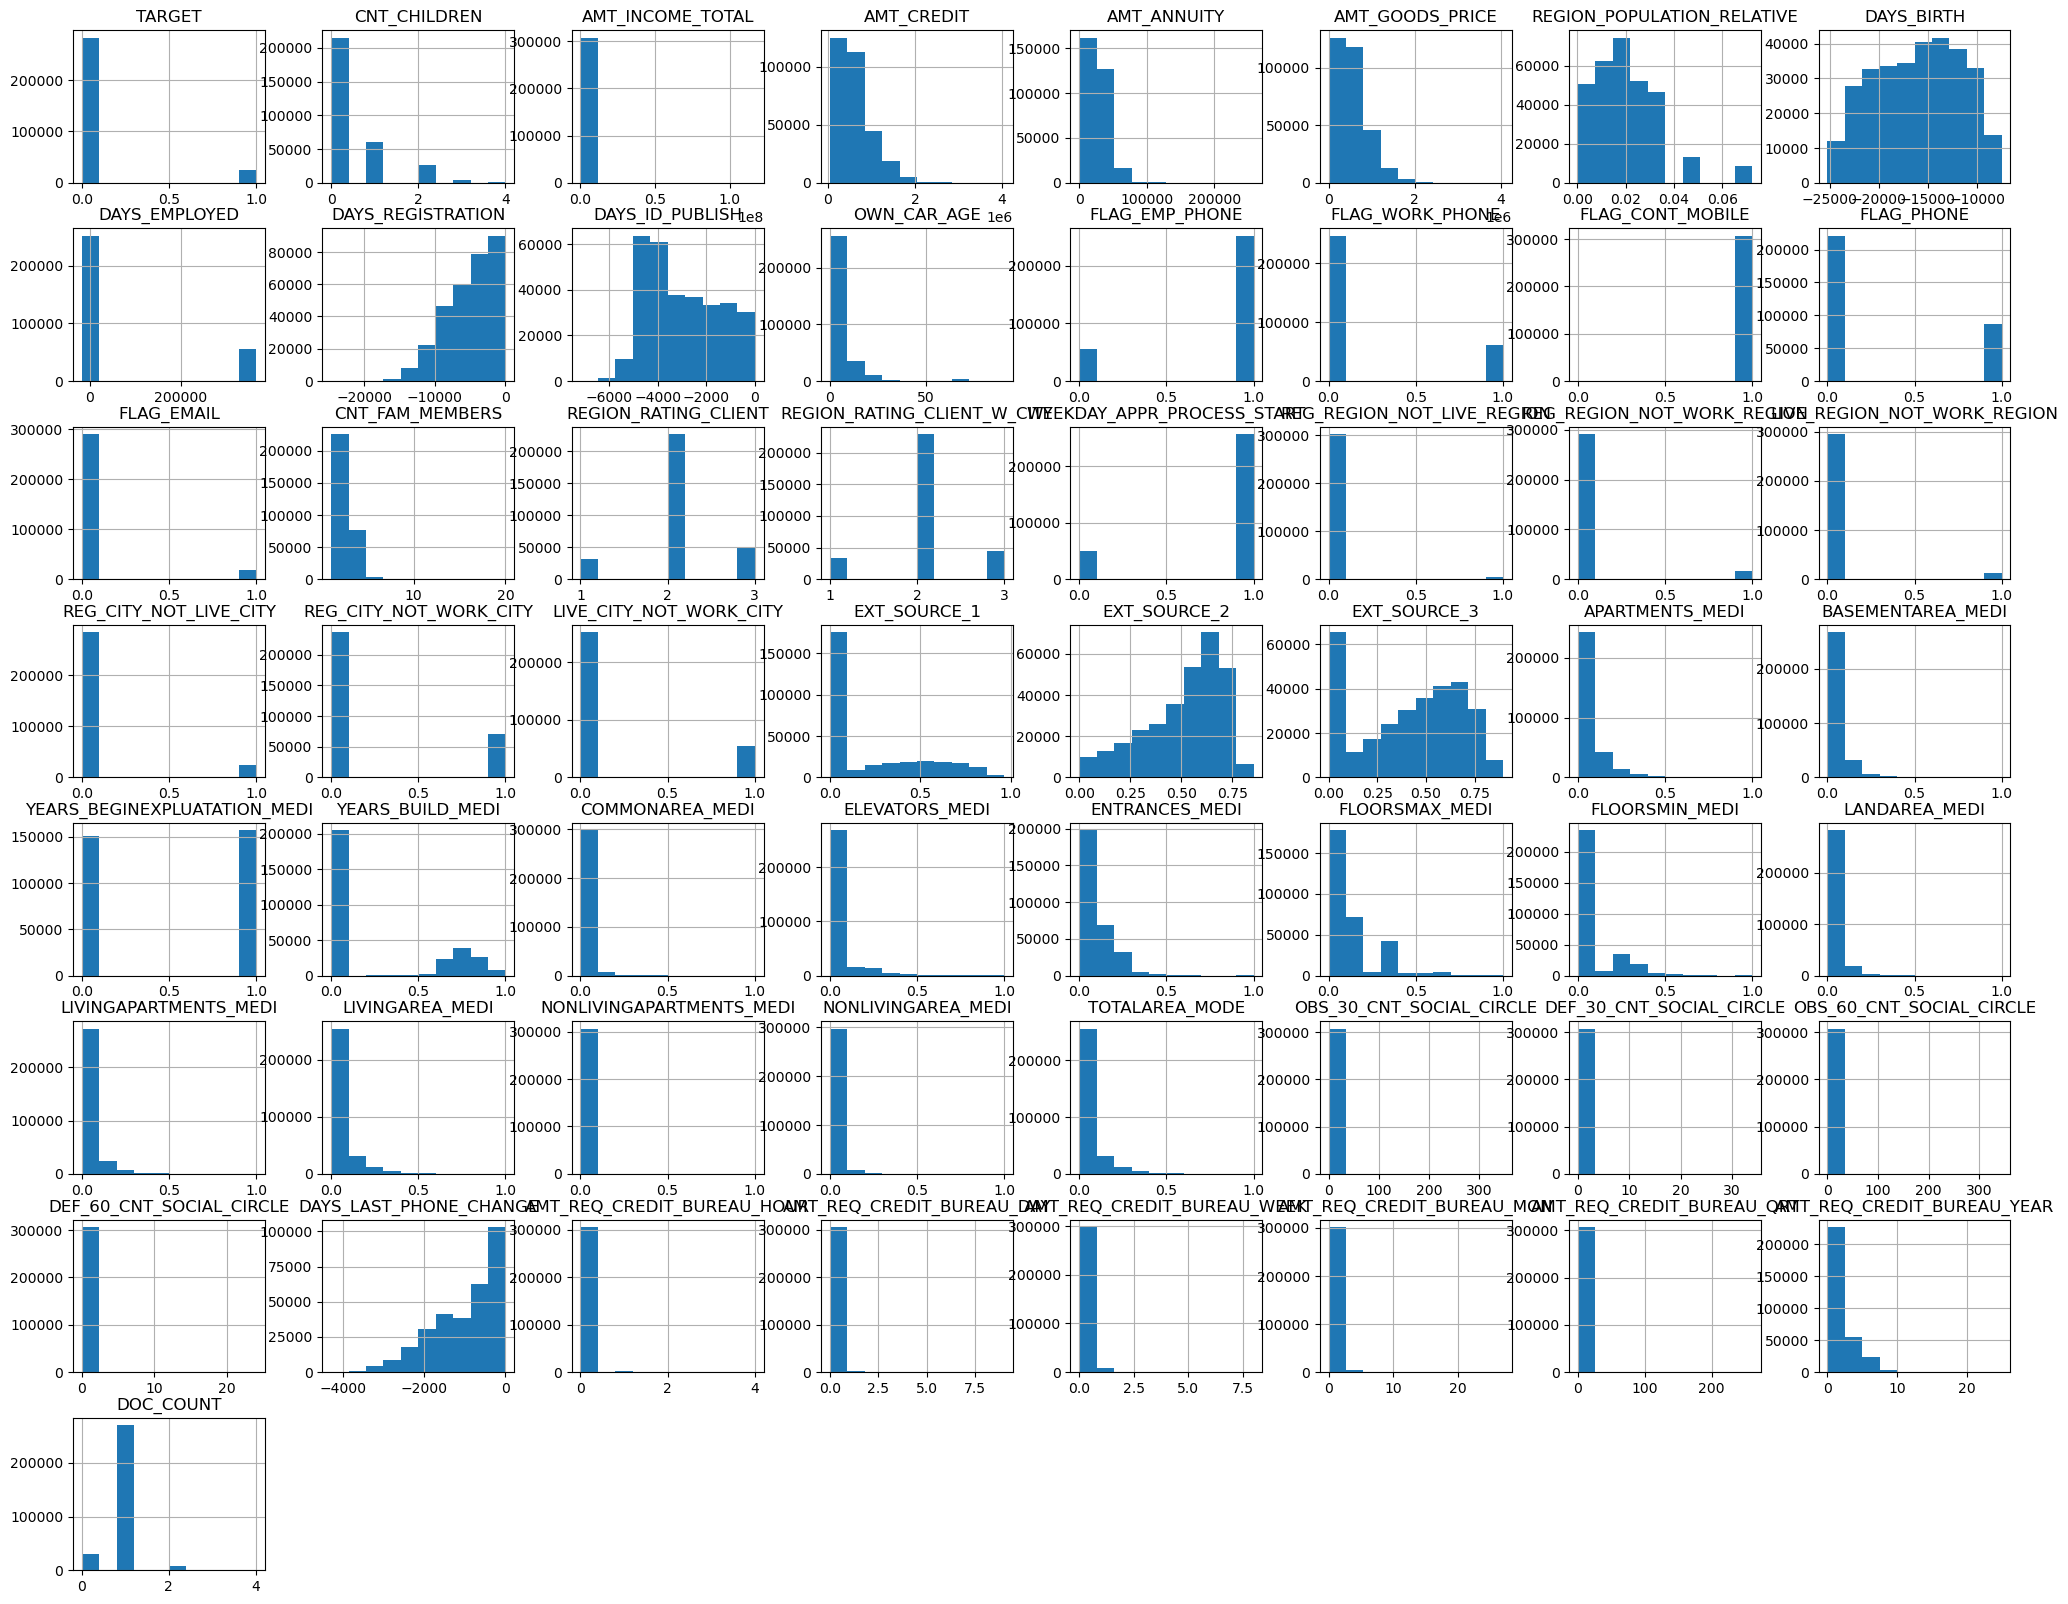

In [4]:
df.hist(bins=10, figsize=(25, 20))

In [5]:
df_kmeans = pd.get_dummies(df)
df_kmeans.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Seperate out the dependent and independen variables
# Split our preprocessed data into our features and target arrays
# this is the target
y = df_kmeans["TARGET"].values
# Drop y out of the dataframe to get the independent variables
# this is the feature list
X_dummies = df_kmeans.drop("TARGET", axis=1)
independent_variables = X_dummies.columns
variables = df_kmeans.columns.tolist()
X_dummies.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,1,0,0,1,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,1,0,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,1,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,1,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.5, stratify=y, random_state=0)

In [8]:
# there was only one value that needed Scaling ASK_AMT
# Therefore I scaled that variable earlier in the code so the whole data set could be exported for testing in other code.
# I Copied the dataframes to the the "standard names" so that "cut and Paste code would work"
X_train_scaled = X_train
X_test_scaled = X_test


In [9]:
# Initialize the K-Means model
model = KMeans(n_clusters=2, random_state=0)

# Fit the model
model.fit(X_train_scaled)

# Predict clusters
predictions = model.predict(X_train_scaled)

# Add the predicted class columns
X_train_scaled["class"] = model.labels_
X_train_scaled.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,class
28141,1,202500.0,450000.0,32746.5,450000.0,0.072508,-15982,-643,-3732.0,-2200,...,0,0,0,0,0,0,1,0,0,0
247655,0,252000.0,1277757.0,54265.5,1084500.0,0.018850,-21936,365243,-8961.0,-4238,...,0,0,0,0,0,0,1,0,0,1
273894,0,135000.0,499261.5,23404.5,351000.0,0.018801,-15127,-460,-2247.0,-4127,...,0,0,0,0,0,0,1,0,0,0
277337,0,67500.0,239850.0,23850.0,225000.0,0.006296,-24941,365243,-2974.0,-4206,...,0,0,0,0,0,0,1,0,0,0
217191,1,76500.0,310500.0,15232.5,310500.0,0.028663,-17452,-3966,-4508.0,-1000,...,0,0,0,0,0,0,1,0,0,0


In [10]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,6.425013e+16
1,2,3.417623e+16
2,3,2.053643e+16
3,4,1.274791e+16
4,5,9.423137e+15


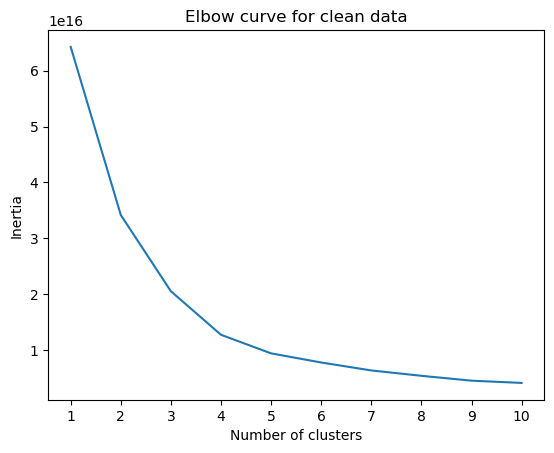

In [11]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for clean data')
plt.show()

In [12]:
 def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [13]:
clusters = get_clusters(2, X_train_scaled) 

In [27]:
clusters

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,class
28141,1,202500.0,450000.0,32746.5,450000.0,0.072508,-15982,-643,-3732.0,-2200,...,0,0,0,0,0,0,1,0,0,0
247655,0,252000.0,1277757.0,54265.5,1084500.0,0.018850,-21936,365243,-8961.0,-4238,...,0,0,0,0,0,0,1,0,0,1
273894,0,135000.0,499261.5,23404.5,351000.0,0.018801,-15127,-460,-2247.0,-4127,...,0,0,0,0,0,0,1,0,0,0
277337,0,67500.0,239850.0,23850.0,225000.0,0.006296,-24941,365243,-2974.0,-4206,...,0,0,0,0,0,0,1,0,0,0
217191,1,76500.0,310500.0,15232.5,310500.0,0.028663,-17452,-3966,-4508.0,-1000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223010,0,202500.0,900000.0,39775.5,900000.0,0.026392,-19757,-5811,-9933.0,-3312,...,0,0,0,0,0,0,1,0,0,1
28756,2,270000.0,528633.0,41040.0,472500.0,0.024610,-12566,-4336,-6658.0,-4277,...,0,0,0,0,0,0,1,0,0,0
303066,1,247500.0,675000.0,28507.5,675000.0,0.018209,-11688,-3862,-11664.0,-2034,...,0,0,0,0,0,0,1,0,0,0
80315,0,90000.0,239850.0,23494.5,225000.0,0.010276,-21553,365243,-11301.0,-4029,...,0,0,0,1,0,0,0,1,0,0


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
# continue the evaluation of the model
y_true = y_test
# Predict  - using the model calculate results for the text data
y_pred = model.predict(X_test_scaled)
# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = tp / (tp + fp)
print(f'precision =  {precision}')
accuracy = (tp + tn)/(tp+tn+fp+fn)
print(f'accuracy =  {accuracy}')
sensitivity = tp / (tp + fn)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

True positives (TP): 3133
True negatives (TN): 96092
False positives (FP): 45248
False negatives (FN): 9280
precision =  0.06475682602674604
accuracy =  0.6453532613997776
sensitivity =  0.2523966808990574
F1 = 0.10306938184689278
              precision    recall  f1-score   support

           0       0.91      0.68      0.78    141340
           1       0.06      0.25      0.10     12413

    accuracy                           0.65    153753
   macro avg       0.49      0.47      0.44    153753
weighted avg       0.84      0.65      0.72    153753



---
# Over Sampling

In [28]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.7, stratify=y, random_state=0)

X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)

In [29]:
train_scores = []
test_scores = []

k = 2 # Number of nearest Neighbors
X_train = X_train_ros
y_train = y_train_ros
X_test = X_test_scaled
y_test = y_test

model = KMeans(n_clusters=k, random_state=50)
model.fit(X_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_scores.append(train_score)
test_scores.append(test_score)

#print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
print(f"k: {k}, Train Score: {train_score:.3f}  Test Score: {test_score:.3f}")

# continue the evaluation of the model
y_true = y_test

# Predict  - using the model calculate results for the text data
y_pred = model.predict(X_test)

# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = tp / (tp + fp)
print(f'precision =  {precision}')
accuracy = (tp + tn)/(tp+tn+fp+fn)
print(f'accuracy =  {accuracy}')
sensitivity = tp / (tp + fn)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

k: 2, Train Score: -20139619.831  Test Score: -27684504.556
True positives (TP): 7435
True negatives (TN): 98282
False positives (FP): 99594
False negatives (FN): 9943
precision =  0.06946715376206448
accuracy =  0.491126761872021
sensitivity =  0.42783979744504547
F1 = 0.11952703626001752
              precision    recall  f1-score   support

           0       0.91      0.50      0.64    197876
           1       0.07      0.43      0.12     17378

    accuracy                           0.49    215254
   macro avg       0.49      0.46      0.38    215254
weighted avg       0.84      0.49      0.60    215254

